In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
truth_values = pd.read_csv("data/trust_values.csv")

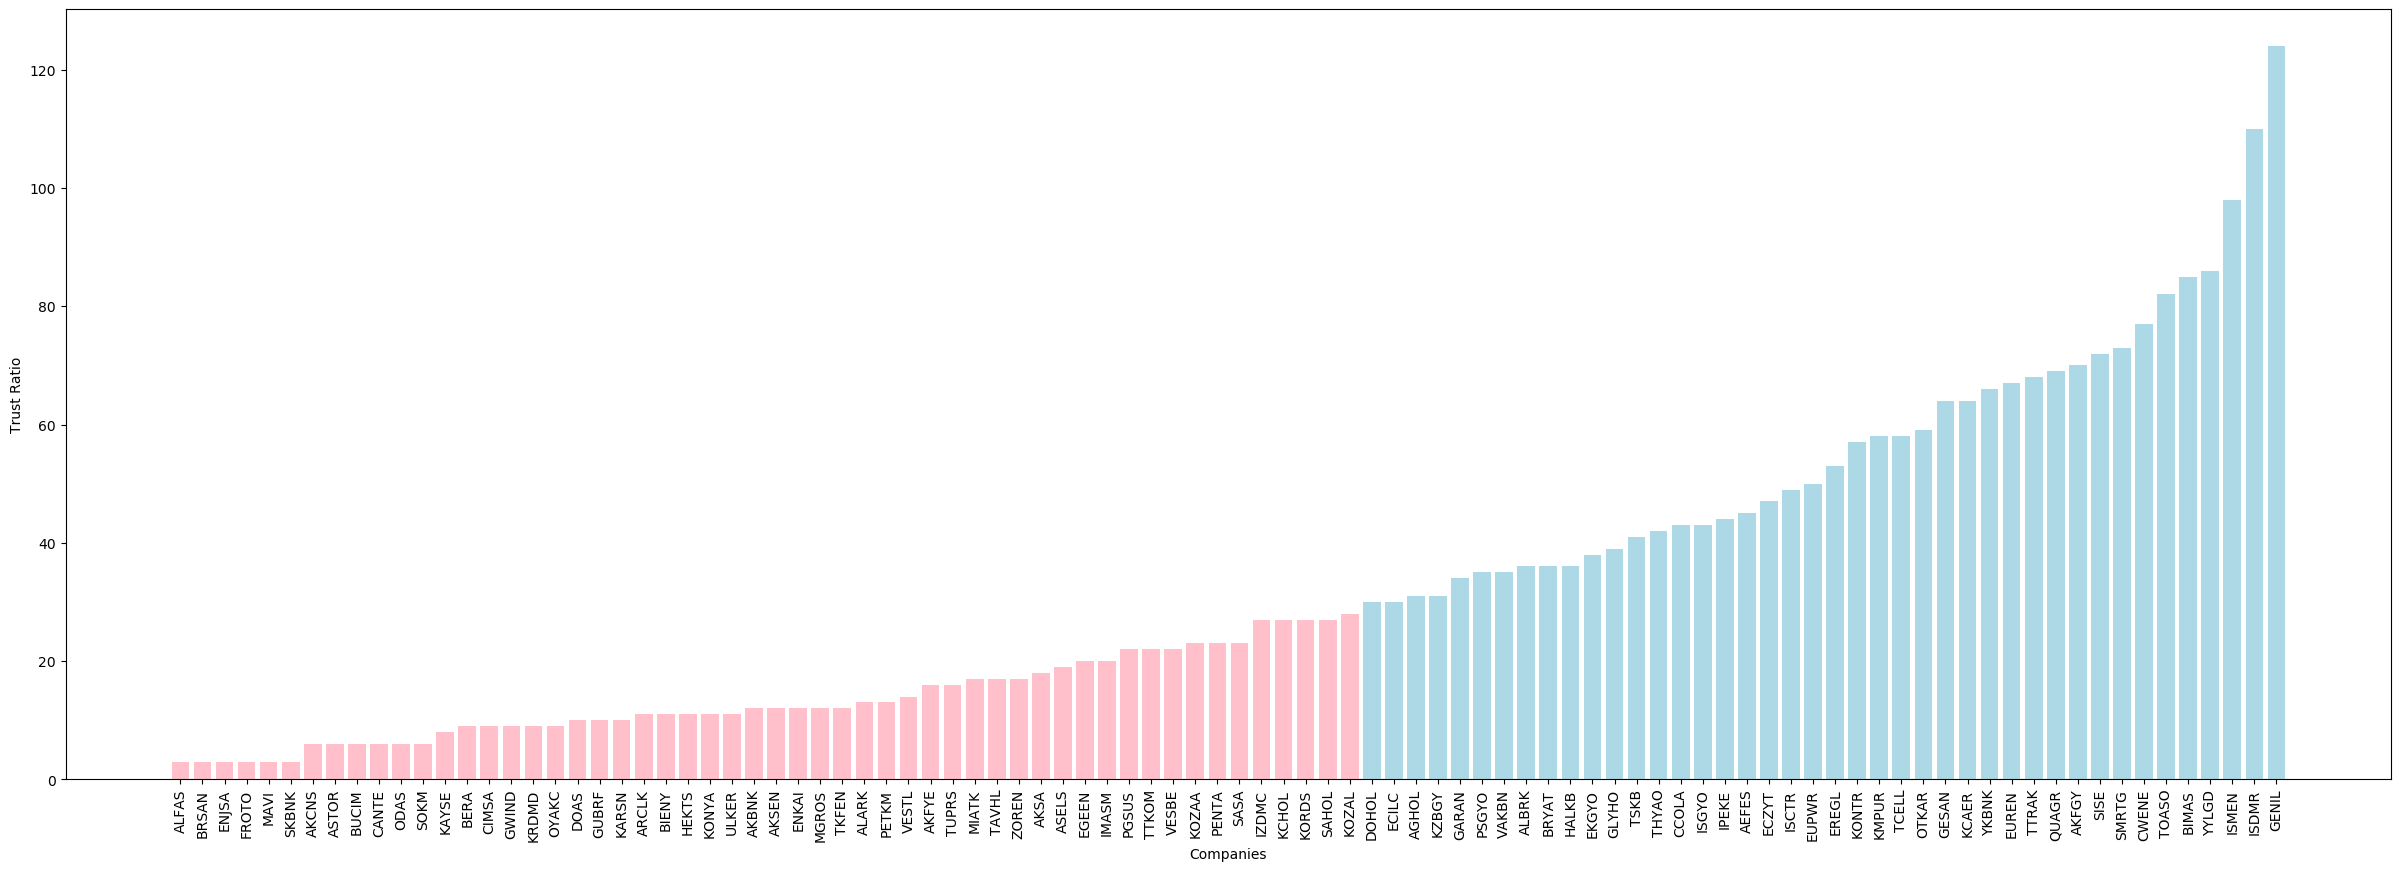

In [7]:
codes = truth_values["code"]
values = truth_values["value"]

filtered_codes_less = list()
filtered_values_less = list()
filtered_codes_more = list()
filtered_values_more = list()
for i in range(len(codes)):
    if(values[i] < 30):
        filtered_codes_less.append(codes[i])
        filtered_values_less.append(values[i])
    else:
        filtered_codes_more.append(codes[i])
        filtered_values_more.append(values[i])


plt.figure(figsize=(30,10))
plt.bar(filtered_codes_less, filtered_values_less, color="pink")
plt.bar(filtered_codes_more, filtered_values_more, color="lightblue")
plt.ylabel("Trust Ratio")
plt.xlabel("Companies")
plt.xticks(rotation=90)

plt.show()